##  第四次作业
这次作业的代码分为两个部分，前半部分是爬取二手房数据和租房数据（我分到的是“西二旗”），后半部分是数据研究。
####  爬取二手房数据

In [149]:
from selenium import webdriver
from selenium.common import NoSuchElementException,StaleElementReferenceException
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

driver=webdriver.Edge()

url="https://esf.fang.com/house-a015277-b07195/i31/"
driver.get(url)

final_data=[]

In [61]:
for page in range(0,20):
    table =driver.find_element('class name','shop_list.shop_list_4')
    
    # Extract table rows
    rows = table.find_elements(By.TAG_NAME, 'dl')

    # Initialize lists to store data
    data = []

    # Loop through rows and extract data
    for row in rows:
    
        p_elements = row.find_elements(By.CLASS_NAME, 'tel_shop')       # 第一类标签
        span_elements = row.find_elements(By.CLASS_NAME, 'price_right') # 第二类标签
        cells = p_elements + span_elements                              # 合并结果

        if cells:  # Skip rows without data (e.g., headers)
            row_data = [cell.text for cell in cells]
            data.append(row_data)

    df = pd.DataFrame(data)

    # 只保留我们需要的数据并加入表中
    for i in range(0,len(df)):
        row_data=[None,None,None]
        items = df.iloc[i,0].split("|")
        for item in items:
            if "㎡" in item:
                row_data[0]=item.strip()
        row_data[1:3]=df.iloc[i,1].split("\n")[0:2]
        final_data.append(row_data)

    # 翻页
    try:
        # next_page=driver.find_element('class name','last')
        next_page = driver.find_element(By.LINK_TEXT, "下一页")
        next_page.click()
    except NoSuchElementException:
        print("NoSuchElementException")
        break

NoSuchElementException


In [64]:
final = pd.DataFrame(final_data, columns=["面积","总价","单价"])
driver.quit()

# 保存为CSV
final.to_csv(r"F:\2025春课程\周四晚上-人工智能与Python程序设计\HW4\西二旗-二手房.csv", index=False, encoding="utf_8")

到这里，二手房数据就爬取完了，下面爬取租房数据。
####  爬取租房数据

In [96]:
driver=webdriver.Edge()

url="https://zu.fang.com/house-a015277-b07195/"
driver.get(url)

final_data=[]
for page in range(0,20):
    table =driver.find_element(By.CSS_SELECTOR, "div.houseList")
    
    # Extract table rows
    rows = table.find_elements(By.TAG_NAME, 'dd')

    # Initialize lists to store data
    data = []

    # Loop through rows and extract data
    for row in rows:
    
        square_elements = row.find_elements(By.CSS_SELECTOR, '.font15.mt12.bold')
        price_elements = row.find_elements(By.CSS_SELECTOR, '.mt5.alingC')

        cells = square_elements+price_elements

        if cells:  # Skip rows without data (e.g., headers)
            row_data = [cell.text for cell in cells]
            data.append(row_data)

    df = pd.DataFrame(data)

    # 只保留我们需要的数据并加入表中
    for i in range(0,len(df)):
        row_data=[None,None,None]
        items = df.iloc[i,0].split("|")
        for item in items:
            if "㎡" in item:
                row_data[0]=item.strip()
        row_data[1]=df.iloc[i,1]
        row_data[2]=int(float(df.iloc[i,1].replace("元/月",""))/float(row_data[0].replace("㎡","")))
        final_data.append(row_data)

    # 翻页
    try:
        # next_page=driver.find_element('class name','last')
        next_page = driver.find_element(By.LINK_TEXT, "下一页")
        next_page.click()
    except NoSuchElementException:
        print("NoSuchElementException")
        break

NoSuchElementException


In [97]:
final = pd.DataFrame(final_data, columns=["面积","总价","单价"])
driver.quit()
final
# 保存为CSV
final.to_csv(r"F:\2025春课程\周四晚上-人工智能与Python程序设计\HW4\西二旗-租房.csv", index=False, encoding="utf_8")

到这里，爬虫部分就结束了，接下来进入数据整理和研究的阶段。
####  数据整理
为了便于后续的处理，我们把所有数据整合成统一格式的表，其中包含如下变量（租房涉及的价格信息均为月租金）：
- 区域：清河 上地 西二旗 西三旗
- 类别：二手房 出租房
- 总价：单位为人民币元
- 面积：单位为平方米
- 单价：总价除以面积

In [120]:
data = []

# 清河二手房
file=open(r"F:\2025春课程\周四晚上-人工智能与Python程序设计\HW4\清河-二手房.csv","r",encoding="utf-8")
line=file.readline()
lines=file.readlines()
for line in lines:
    row_data=[None,None,None,None,None]
    row_data[0]='清河'
    row_data[1]='二手房'
    row_data[2]=float(line.strip().split(",")[0])
    row_data[3]=float(line.strip().split(",")[1])
    row_data[4]=row_data[2]/row_data[3]
    data.append(row_data)
file.close()

# 清河租房
file=open(r"F:\2025春课程\周四晚上-人工智能与Python程序设计\HW4\清河-租房.csv","r",encoding="utf-8")
line=file.readline()
lines=file.readlines()
for line in lines:
    row_data=[None,None,None,None,None]
    row_data[0]='清河'
    row_data[1]='租房'
    row_data[2]=float(line.strip().split(",")[0])
    row_data[3]=float(line.strip().split(",")[1])
    row_data[4]=row_data[2]/row_data[3]
    data.append(row_data)
file.close()

# 上地二手房
file=open(r"F:\2025春课程\周四晚上-人工智能与Python程序设计\HW4\上地-二手房.csv","r",encoding="utf-8")
line=file.readline()
lines=file.readlines()
for line in lines:
    row_data=[None,None,None,None,None]
    row_data[0]='上地'
    row_data[1]='二手房'
    row_data[2]=float(line.strip().split(",")[-3])
    row_data[3]=float(line.strip().split(",")[-2])
    row_data[4]=float(line.strip().split(",")[-1])
    data.append(row_data)
file.close()

# 上地租房
file=open(r"F:\2025春课程\周四晚上-人工智能与Python程序设计\HW4\上地-租房.csv","r",encoding="utf-8")
line=file.readline()
lines=file.readlines()
for line in lines:
    row_data=[None,None,None,None,None]
    row_data[0]='上地'
    row_data[1]='租房'
    row_data[2]=float(line.strip().split(",")[-2])
    row_data[3]=float(line.strip().split(",")[-1])
    row_data[4]=row_data[2]/row_data[3]
    data.append(row_data)
file.close()

# 西二旗二手房
file=open(r"F:\2025春课程\周四晚上-人工智能与Python程序设计\HW4\西二旗-二手房.csv","r",encoding="utf-8")
line=file.readline()
lines=file.readlines()
for line in lines:
    row_data=[None,None,None,None,None]
    row_data[0]='西二旗'
    row_data[1]='二手房'
    row_data[2]=float(line.strip().split(",")[1].replace("万",""))*10000
    row_data[3]=float(line.strip().split(",")[0].replace("㎡",""))
    row_data[4]=float(line.strip().split(",")[2].replace("元/㎡",""))
    data.append(row_data)
file.close()

# 西二旗租房
file=open(r"F:\2025春课程\周四晚上-人工智能与Python程序设计\HW4\西二旗-租房.csv","r",encoding="utf-8")
line=file.readline()
lines=file.readlines()
for line in lines:
    row_data=[None,None,None,None,None]
    row_data[0]='西二旗'
    row_data[1]='租房'
    row_data[2]=float(line.strip().split(",")[1].replace("元/月",""))
    row_data[3]=float(line.strip().split(",")[0].replace("㎡",""))
    row_data[4]=float(line.strip().split(",")[2])
    data.append(row_data)
file.close()

# 西三旗二手房
file=open(r"F:\2025春课程\周四晚上-人工智能与Python程序设计\HW4\西三旗-二手房.csv","r",encoding="utf-8")
line=file.readline()
lines=file.readlines()
for line in lines:
    row_data=[None,None,None,None,None]
    row_data[0]='西三旗'
    row_data[1]='二手房'
    row_data[2]=float(line.strip().split(",")[-2])*10000
    row_data[3]=float(line.strip().split(",")[-14].replace("平米",""))
    row_data[4]=float(line.strip().split(",")[-1].replace("元/平米",""))
    data.append(row_data)
file.close()

# 西三旗租房
file=open(r"F:\2025春课程\周四晚上-人工智能与Python程序设计\HW4\西三旗-租房.csv","r",encoding="utf-8")
line=file.readline()
lines=file.readlines()
for line in lines:
    row_data=[None,None,None,None,None]
    row_data[0]='西三旗'
    row_data[1]='租房'
    row_data[2]=float(line.strip().split(",")[-4])
    row_data[3]=float(line.strip().split(",")[-3])
    row_data[4]=row_data[2]/row_data[3]
    data.append(row_data)
file.close()


In [210]:
final = pd.DataFrame(data, columns=["区域","类别","总价","面积","单价"])
final

,区域,类别,总价,面积,单价
0,清河,二手房,14500000.0,180.00,80555.555556
1,清河,二手房,23500000.0,185.05,126992.704674
2,清河,二手房,14700000.0,143.66,102324.933872
3,清河,二手房,16000000.0,139.00,115107.913669
4,清河,二手房,39990000.0,553.91,72195.844090
...,...,...,...,...,...
3746,西三旗,租房,7500.0,99.00,75.757576
3747,西三旗,租房,6500.0,100.00,65.000000
3748,西三旗,租房,1900.0,25.00,76.000000
3749,西三旗,租房,1899.0,70.00,27.128571


#### 描述性统计
对各区域的单价数据分类进行描述性统计，结果见下。

In [256]:
grouped = final.groupby(['区域','类别'])["单价"].agg(['max','min','mean', 'median', 'std'])
pd.DataFrame(grouped)

max           min           mean         median  \
区域  类别                                                               
上地  二手房  162466.000000  57500.000000  106346.980000  105347.000000   
    租房      283.333333     15.254237     116.573542     109.589041   
清河  二手房  184172.661871  43436.293436  108664.404680  110101.010101   
    租房     4469.273743     15.151515     171.905850     123.333333   
西三旗 二手房  119219.000000  37591.000000   72848.079137   72262.000000   
    租房      240.000000      1.000000      97.949027      89.403974   
西二旗 二手房  119047.000000  43003.000000   76601.005650   76933.000000   
    租房      211.000000     42.000000     113.473684     101.000000   

                  std  
区域  类别                 
上地  二手房  25266.586011  
    租房      39.515942  
清河  二手房  26411.811575  
    租房     423.202469  
西三旗 二手房  14805.766458  
    租房      38.346398  
西二旗 二手房  16050.558284  
    租房      32.910580

####  离群值
下面来看看有没有离群值，使用“距离平均值三倍标准差”的办法筛选。可以看到，大约有0.2%的离群值，是很少的，再说我们用的是中位数。

In [257]:
def detect_outliers_zscore(group):
    mean = group['单价'].mean()
    std = group['单价'].std()
    group['Z-Score'] = (group['单价'] - mean) / std
    group['Outlier_Z'] = np.abs(group['Z-Score']) > 3
    return group

grouped = final.groupby(['区域', '类别']).apply(detect_outliers_zscore)
print(grouped[['区域', '类别', '单价', 'Outlier_Z']])
grouped['Outlier_Z'].agg(['max','min','mean', 'median', 'std'])

               区域   类别        单价  Outlier_Z
区域  类别                                     
上地  二手房 1735   上地  二手房   81403.0      False
        1736   上地  二手房  127837.0      False
        1737   上地  二手房   74796.0      False
        1738   上地  二手房  161554.0      False
        1739   上地  二手房  127578.0      False
...           ...  ...       ...        ...
西二旗 租房  3458  西二旗   租房     146.0      False
        3459  西二旗   租房     176.0      False
        3460  西二旗   租房     130.0      False
        3461  西二旗   租房      76.0      False
        3462  西二旗   租房      91.0      False

[3751 rows x 4 columns]


C:\Users\小郭\AppData\Local\Temp\ipykernel_42020\1614207724.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = final.groupby(['区域', '类别']).apply(detect_outliers_zscore)


max           True
min          False
mean      0.002399
median         0.0
std       0.048931
Name: Outlier_Z, dtype: object

####  画出租售比图A
到这里，就可以计算各区域的租售比并画图

In [258]:
grouped = final.groupby(['区域','类别'])["单价"].agg('median')
zushoubi = []
for i in range(0,4):
    zushoubi.append(grouped.iloc[2*i]/grouped.iloc[2*i+1])
zushoubi

[961.291375, 892.7108927108928, 808.2638518518519, 761.7128712871287]

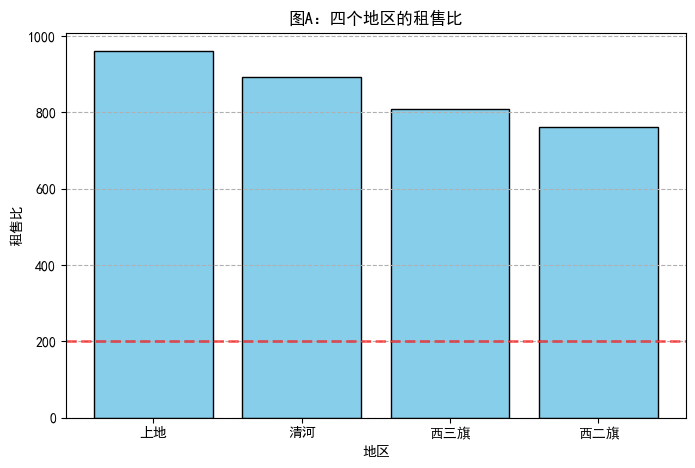

In [259]:
plt.rcParams['font.sans-serif'] = ['SimHei']
categories = ["上地", '清河', '西三旗', '西二旗']
values = zushoubi

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='skyblue', edgecolor='black')

plt.xlabel('地区')
plt.ylabel('租售比')
plt.title('图A：四个地区的租售比')
plt.grid(axis='y', linestyle='--', alpha=1)

plt.axhline(y=200,color='red',linestyle='--',linewidth=2,alpha=0.6)

plt.show()

####  拟合模型并预测
拟合的过程比较简单，不过需要先生成交互项。

In [219]:
final_new = final.replace({'清河':1, '上地':2, '西三旗':3, '西二旗':4, '二手房':1, '租房':2})

# 生成交互项
final_new = final_new.values
interaction = (final_new[:, 0] * final_new[:, 3]).reshape(-1, 1)
final_new = np.hstack([final_new, interaction])
final_new = pd.DataFrame(final_new, columns=["区域","类别","总价","面积","单价","区域*面积"])
final_new

C:\Users\小郭\AppData\Local\Temp\ipykernel_42020\3366118452.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_new = final.replace({'清河':1, '上地':2, '西三旗':3, '西二旗':4, '二手房':1, '租房':2})


,区域,类别,总价,面积,单价,区域*面积
0,1.0,1.0,14500000.0,180.00,80555.555556,180.00
1,1.0,1.0,23500000.0,185.05,126992.704674,185.05
2,1.0,1.0,14700000.0,143.66,102324.933872,143.66
3,1.0,1.0,16000000.0,139.00,115107.913669,139.00
4,1.0,1.0,39990000.0,553.91,72195.844090,553.91
...,...,...,...,...,...,...
3746,3.0,2.0,7500.0,99.00,75.757576,297.00
3747,3.0,2.0,6500.0,100.00,65.000000,300.00
3748,3.0,2.0,1900.0,25.00,76.000000,75.00
3749,3.0,2.0,1899.0,70.00,27.128571,210.00


In [249]:
# 拟合二手房模型
subset=final_new[final_new["类别"]==1]
y=subset[["单价"]]
x=subset[["区域",'面积','区域*面积']]
model = LinearRegression()
model.fit(x,y)

print(f'系数: {model.coef_}')
print(f'截距: {model.intercept_}')

系数: [[-14039.0726983     -37.84294163     18.92391691]]
截距: [127254.5021677]


In [250]:
# 预测
x_espred50 = pd.DataFrame([[1,50,50],[2,50,100],[3,50,150],[4,50,200]],columns=["区域","面积","区域*面积"])
y_espred50 = model.predict(x_espred50)
print('清河、上地、西三旗、西二旗四个地区50平米二手房的预测值：',y_espred50.flatten())
x_espred100 = pd.DataFrame([[1,100,100],[2,100,200],[3,100,300],[4,100,400]],columns=["区域","面积","区域*面积"])
y_espred100 = model.predict(x_espred100)
print('清河、上地、西三旗、西二旗四个地区100平米二手房的预测值：',y_espred100.flatten())

清河、上地、西三旗、西二旗四个地区50平米二手房的预测值： [112269.47823357  99176.60138079  86083.72452801  72990.84767524]
清河、上地、西三旗、西二旗四个地区100平米二手房的预测值： [111323.52699775  99176.84599049  87030.16498324  74883.48397599]


In [252]:
# 拟合租房模型并预测
subset=final_new[final_new["类别"]==2]
y=subset[["单价"]]
x=subset[["区域",'面积','区域*面积']]
model = LinearRegression()
model.fit(x,y)

print(f'系数: {model.coef_}')
print(f'截距: {model.intercept_}')

x_zfpred50 = pd.DataFrame([[1,50,50],[2,50,100],[3,50,150],[4,50,200]],columns=["区域","面积","区域*面积"])
y_zfpred50 = model.predict(x_zfpred50)
print('清河、上地、西三旗、西二旗四个地区50平米租房的预测值：',y_zfpred50.flatten())
x_zfpred100 = pd.DataFrame([[1,100,100],[2,100,200],[3,100,300],[4,100,400]],columns=["区域","面积","区域*面积"])
y_zfpred100 = model.predict(x_zfpred100)
print('清河、上地、西三旗、西二旗四个地区100平米租房的预测值：',y_zfpred100.flatten())

系数: [[11.50035153  1.35384447 -0.46196785]]
截距: [87.02087858]
清河、上地、西三旗、西二旗四个地区50平米租房的预测值： [143.11506082 131.51701961 119.9189784  108.3209372 ]
清河、上地、西三旗、西二旗四个地区100平米租房的预测值： [187.70889153 153.01245759 118.31602365  83.6195897 ]


####  计算租售比并画图

In [253]:
# 基于预测值计算租售比
zushoubi50=y_espred50/y_zfpred50
zushoubi100=y_espred100/y_zfpred100

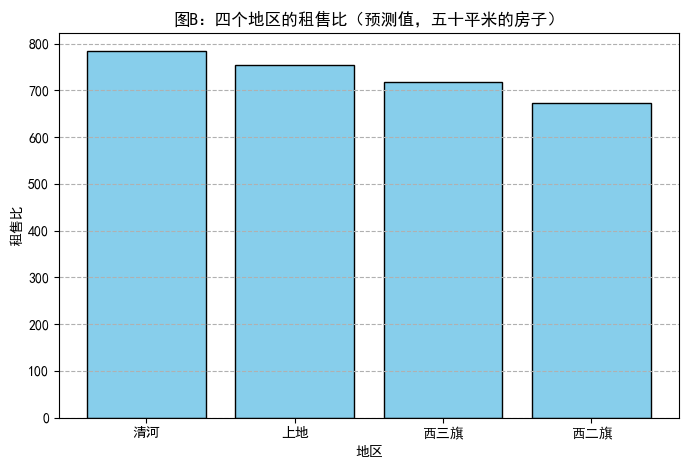

In [254]:
# 画50平米的图
categories = ["清河", '上地', '西三旗', '西二旗']
values = zushoubi50.flatten().tolist()

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='skyblue', edgecolor='black')

plt.xlabel('地区')
plt.ylabel('租售比')
plt.title('图B：四个地区的租售比（预测值，五十平米的房子）')
plt.grid(axis='y', linestyle='--', alpha=1)

plt.show()

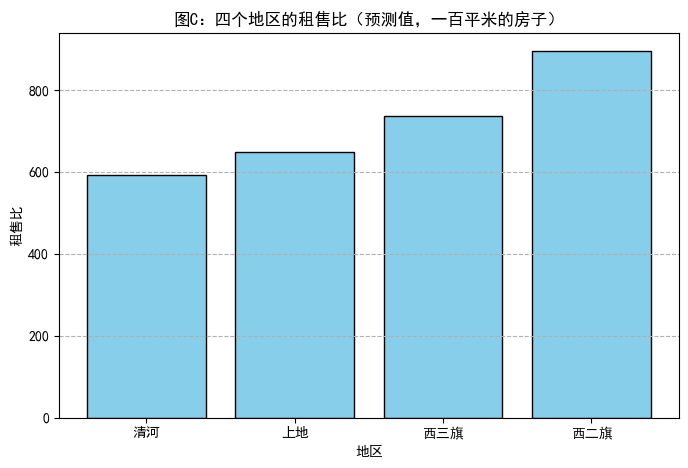

In [255]:
# 画100平米的图
categories = ["清河", '上地', '西三旗', '西二旗']
values = zushoubi100.flatten().tolist()

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='skyblue', edgecolor='black')

plt.xlabel('地区')
plt.ylabel('租售比')
plt.title('图C：四个地区的租售比（预测值，一百平米的房子）')
plt.grid(axis='y', linestyle='--', alpha=1)

plt.show()